In [222]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [233]:
def lowess(x,y, f=2/3, iter=3):
    m = len(x)
    r = int(np.ceil(f*n))
    # 각 x점에 대해 25번째로 가까운 점과의 거리를 출력
    h = [np.sort(np.abs(x-x[i]))[r] for i in range(n)]
    # A(i,j) : 점i와 점j의 거리 점j와 25번째 이상으로 먼 점들은 모두 1처리가 되고 아닌 것들은 25번째 점과의 거리로 나눠짐
    w = np.clip(np.abs((x[:,None] - x[None,:])/h),0,1)
    # 가까운 거에 가중치가 더 많이 생기게 되고, 1인 값들은 모두 가중치가 0이 됨
    w = (1-w**3)**3
    yest = np.zeros(n)
    delta = np.ones(n)
    
    X = np.vstack((np.ones_like(x),x)).T
    for iteration in range(iter):
        for i in range(n):
            weights = delta*w[:,i]
            beta = np.matmul(np.matmul(np.matmul(linalg.inv(np.matmul(X.T,np.matmul(np.diag(weights),X))),X.T),np.diag(weights)),y)
            yest[i] = beta[0] + beta[1]*x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6*s),-1,1)
        delta = (1 - delta**2)**2
        
    return yest

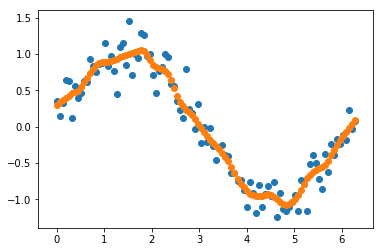

In [249]:
np.random.seed(0)

n = 100
x = np.linspace(0, 2*np.pi, n)
y = np.sin(x) + 0.2*np.random.randn(n)
f = 0.1
yest = lowess(x,y,f=f,iter=2)
plt.scatter(x,y)
plt.scatter(x,yest)
plt.show()